In [1]:
# ASSIGNMENT QUESTIONS DSA PRACTICE QUESTIONS

q.1 define a doubly linked list

A doubly linked list is a type of linked data structure where each node contains three fields: two pointers (references) to the previous and next nodes in the sequence, and a data element. This structure allows traversal both forward and backward through the list. Here are the main components of a doubly linked list:

1. **Node Structure**: Each node in a doubly linked list contains:
   - Data: Holds the actual data element.
   - Pointer to Previous Node (`prev`): Points to the previous node in the list.
   - Pointer to Next Node (`next`): Points to the next node in the list.

2. **Head and Tail Pointers**: 
   - **Head**: Points to the first node in the list.
   - **Tail**: Points to the last node in the list.

3. **Operations**:
   - **Insertion**: Nodes can be inserted at the beginning, end, or middle of the list.
   - **Deletion**: Nodes can be removed from any position in the list.
   - **Traversal**: Allows traversal in both forward and backward directions.

4. **Advantages**:
   - Supports O(1) time complexity for insertion and deletion at the beginning or end of the list.
   - Provides bidirectional traversal.

5. **Disadvantages**:
   - Requires more memory than a singly linked list due to the additional pointer for each node.
   - More complex to implement and manage due to the bidirectional pointers.

In essence, a doubly linked list provides flexibility in terms of traversal and operations compared to a singly linked list, at the cost of increased memory usage and complexity in implementation.

q.2 write a function to reverse a linked list in- place.

To reverse a linked list in-place, you need to modify the links between nodes without using extra space for another data structure. Here's a Python function that accomplishes this for a singly linked list:

In [2]:
class ListNode:
    def __init__(self, value=0, next=None):
        self.value = value
        self.next = next

def reverse_linked_list(head):
    prev = None
    current = head

    while current:
        next_node = current.next  # Store the next node
        current.next = prev       # Reverse the link
        prev = current            # Move prev and current one step forward
        current = next_node       # Move current one step forward

    return prev  # prev now points to the new head of the reversed list

# Example usage:
# Create a linked list: 1 -> 2 -> 3 -> 4 -> None
head = ListNode(1, ListNode(2, ListNode(3, ListNode(4))))
print("Original list:")
current = head
while current:
    print(current.value, end=" -> ")
    current = current.next
print("None")

# Reverse the linked list
new_head = reverse_linked_list(head)

print("Reversed list:")
current = new_head
while current:
    print(current.value, end=" -> ")
    current = current.next
print("None")


Original list:
1 -> 2 -> 3 -> 4 -> None
Reversed list:
4 -> 3 -> 2 -> 1 -> None


Explanation:
ListNode Class: Represents each node in the linked list with a value attribute and a next pointer.
reverse_linked_list Function:
Initialize prev to None (because the new tail of the reversed list will point to None).
Use current to traverse through the list.
Inside the loop:
Store current.next in next_node (to keep track of the next node).
Reverse the current.next pointer to point to prev.
Move prev and current one step forward.
After exiting the loop, prev will be pointing to the new head of the reversed list.

q.3 Detect cycle in a linked list.

Detecting a cycle in a linked list involves checking if there exists any node that points back to a previously visited node, indicating the presence of a cycle. Here's how you can implement a cycle detection algorithm using Floyd's Cycle Detection Algorithm (also known as the Tortoise and Hare algorithm):

In [3]:
class ListNode:
    def __init__(self, value=0, next=None):
        self.value = value
        self.next = next

def has_cycle(head):
    if not head or not head.next:
        return False
    
    slow = head
    fast = head.next  # Start with fast moving 2 steps ahead

    while fast and fast.next:
        if slow == fast:
            return True
        slow = slow.next        # Move slow by 1 step
        fast = fast.next.next   # Move fast by 2 steps
    
    return False

# Example usage:
# Create a linked list with a cycle: 1 -> 2 -> 3 -> 4 -> 2 (points back to 2)
head = ListNode(1)
head.next = ListNode(2)
head.next.next = ListNode(3)
head.next.next.next = ListNode(4)
head.next.next.next.next = head.next  # Creates a cycle

# Detect cycle
cycle_exists = has_cycle(head)
print("Cycle exists:", cycle_exists)


Cycle exists: True


Explanation:
ListNode Class: Represents each node in the linked list with a value attribute and a next pointer.

has_cycle Function:

Initialize two pointers, slow and fast, starting from the head.
slow moves one step at a time (slow = slow.next).
fast moves two steps at a time (fast = fast.next.next).
If there is a cycle, slow and fast will eventually meet (slow == fast).
If fast reaches None (end of list), there is no cycle (return False).
Example Usage: Creates a linked list with a cycle and checks for its existence using has_cycle.

This algorithm is efficient with a time complexity of 
𝑂
(
𝑛
)
O(n) and a space complexity of 
𝑂
(
1
)
O(1), making it suitable for detecting cycles in large linked lists without using additional space.

q.4  Merge two sorted linked list into one

1->3->5->6->null and 2->4->6->8->null should be merged to make

1->2->3->4->5->6->7->8

To merge two sorted linked lists into one sorted list, you can iterate through both lists simultaneously, comparing the nodes and appending them to a new merged list in the correct order. Here's how you can implement this in Python:

In [4]:
class ListNode:
    def __init__(self, value=0, next=None):
        self.value = value
        self.next = next

def merge_sorted_lists(l1, l2):
    dummy = ListNode(0)
    current = dummy
    
    while l1 and l2:
        if l1.value <= l2.value:
            current.next = l1
            l1 = l1.next
        else:
            current.next = l2
            l2 = l2.next
        current = current.next
    
    if l1:
        current.next = l1
    elif l2:
        current.next = l2
    
    return dummy.next

# Example usage:
# Create two sorted linked lists: 1->3->5->6->None and 2->4->6->8->None
l1 = ListNode(1)
l1.next = ListNode(3)
l1.next.next = ListNode(5)
l1.next.next.next = ListNode(6)

l2 = ListNode(2)
l2.next = ListNode(4)
l2.next.next = ListNode(6)
l2.next.next.next = ListNode(8)

# Merge the two lists
merged_list = merge_sorted_lists(l1, l2)

# Print the merged list
current = merged_list
while current:
    print(current.value, end=" -> ")
    current = current.next
print("None")


1 -> 2 -> 3 -> 4 -> 5 -> 6 -> 6 -> 8 -> None


Explanation:
ListNode Class: Represents each node in the linked list with a value attribute and a next pointer.

merge_sorted_lists Function:

Create a dummy node to simplify the code for handling edge cases.
Use current to build the merged list.
Iterate through both lists (l1 and l2), comparing values:
Append the smaller node (l1 or l2) to current.next.
Move l1 or l2 to the next node (l1 = l1.next or l2 = l2.next).
Append any remaining nodes from l1 or l2 to current.next.
Return dummy.next, which points to the head of the merged list.

Example Usage: Creates two sorted linked lists, merges them using merge_sorted_lists, and prints the merged list.

This approach ensures that the merged list remains sorted without requiring extra space, with a time complexity of 
𝑂
(
𝑛
+
𝑚
)
O(n+m), where 
𝑛
n and 
𝑚
m are the lengths of l1 and l2, respectively.

q.5 Write a function to remove the nth node from the end in a linked list

1->2->3->4->5->6, removing 2nd node from end will return 1->2->3->4->6 

To remove the 
𝑛
n-th node from the end of a singly linked list, you can use a two-pointer technique. Here’s how you can implement this in Python:

In [5]:
class ListNode:
    def __init__(self, value=0, next=None):
        self.value = value
        self.next = next

def remove_nth_from_end(head, n):
    # Create a dummy node to handle edge cases like removing the head
    dummy = ListNode(0)
    dummy.next = head
    first = dummy
    second = dummy

    # Move the second pointer n steps ahead
    for _ in range(n + 1):
        second = second.next
    
    # Move both pointers until second reaches the end
    while second:
        first = first.next
        second = second.next
    
    # Remove the nth node from the end
    first.next = first.next.next
    
    return dummy.next

# Example usage:
# Create a linked list: 1->2->3->4->5->6
head = ListNode(1)
head.next = ListNode(2)
head.next.next = ListNode(3)
head.next.next.next = ListNode(4)
head.next.next.next.next = ListNode(5)
head.next.next.next.next.next = ListNode(6)

n = 2
# Remove the 2nd node from the end
new_head = remove_nth_from_end(head, n)

# Print the updated linked list
current = new_head
while current:
    print(current.value, end=" -> ")
    current = current.next
print("None")


1 -> 2 -> 3 -> 4 -> 6 -> None


Explanation:
ListNode Class: Represents each node in the linked list with a value attribute and a next pointer.

remove_nth_from_end Function:

Create a dummy node to handle edge cases (like removing the head node).
Initialize first and second pointers to dummy.
Move the second pointer n steps ahead to create a gap of n nodes between first and second.
Move both first and second pointers simultaneously until second reaches the end of the list (second = None).
first will be pointing to the node just before the node to be removed.
Remove the nth node from the end by adjusting the next pointer of first.
Return dummy.next, which points to the head of the updated list.
Example Usage: Creates a linked list, removes the 
𝑛
n-th node from the end using remove_nth_from_end, and prints the updated list.

This approach efficiently removes the 
𝑛
n-th node from the end of the linked list in a single pass through the list, with a time complexity of 
𝑂
(
𝐿
)
O(L), where 
𝐿
L is the length of the linked list.








q.6 Remove duplicates from a sorted linked list

1->2->3->4->4->5 should be changed to 1->2->3->4->5

To remove duplicates from a sorted singly linked list, you can iterate through the list and compare each node with its next node. If they have the same value, you adjust the pointers to skip the duplicate node. Here's how you can implement this in Python:

In [6]:
class ListNode:
    def __init__(self, value=0, next=None):
        self.value = value
        self.next = next

def remove_duplicates(head):
    current = head
    
    while current and current.next:
        if current.value == current.next.value:
            current.next = current.next.next  # Skip the duplicate node
        else:
            current = current.next  # Move to the next node
    
    return head

# Function to print the linked list
def print_linked_list(head):
    current = head
    while current:
        print(current.value, end=" -> ")
        current = current.next
    print("None")

# Example usage:
# Create a sorted linked list with duplicates: 1->2->3->4->4->5
head = ListNode(1)
head.next = ListNode(2)
head.next.next = ListNode(3)
head.next.next.next = ListNode(4)
head.next.next.next.next = ListNode(4)
head.next.next.next.next.next = ListNode(5)

print("Original list:")
print_linked_list(head)

# Remove duplicates
new_head = remove_duplicates(head)

print("List after removing duplicates:")
print_linked_list(new_head)


Original list:
1 -> 2 -> 3 -> 4 -> 4 -> 5 -> None
List after removing duplicates:
1 -> 2 -> 3 -> 4 -> 5 -> None


Explanation:
ListNode Class: Represents each node in the linked list with a value attribute and a next pointer.

remove_duplicates Function:

Initialize current to the head of the linked list.
Traverse the list using current and current.next.
If current.value equals current.next.value, adjust the next pointer of current to skip the duplicate node (current.next = current.next.next).
If no duplicates are found, move current to current.next.
Repeat until current or current.next becomes None.
Return the head of the updated list.
print_linked_list Function: Utility function to print the elements of the linked list for demonstration purposes.

Example Usage: Creates a sorted linked list with duplicates, removes duplicates using remove_duplicates, and prints the updated list.

This approach efficiently removes duplicates from a sorted linked list in place with a time complexity of 
𝑂
(
𝑛
)
O(n), where 
𝑛
n is the number of nodes in the linked list. It uses a single pass through the list, adjusting pointers as necessary to skip duplicate nodes.








q.7 Find the intersection of the two linked lists

1->2->3->4->8->6->9 5->1->6->7 , intersection 1->6

To find the intersection of two linked lists, you need to identify the node where the lists converge (i.e., the first common node they share). Here’s how you can implement this in Python:

In [8]:
class ListNode:
    def __init__(self, value=0, next=None):
        self.value = value
        self.next = next

def get_intersection(head1, head2):
    if not head1 or not head2:
        return None
    
    # Function to get the length of a linked list
    def get_length(head):
        length = 0
        current = head
        while current:
            length += 1
            current = current.next
        return length
    
    # Get the lengths of both linked lists
    len1 = get_length(head1)
    len2 = get_length(head2)
    
    # Move the longer list's head pointer forward by the difference in lengths
    while len1 > len2:
        head1 = head1.next
        len1 -= 1
    
    while len2 > len1:
        head2 = head2.next
        len2 -= 1
    
    # Traverse both lists until we find the intersection or reach the end
    while head1 and head2:
        if head1 == head2:
            return head1
        head1 = head1.next
        head2 = head2.next
    
    return None  # No intersection found

# Example usage:
# Create two linked lists with an intersection: 1->2->3->4->8->6->9 and 5->1->6->7
head1 = ListNode(1)
head1.next = ListNode(2)
head1.next.next = ListNode(3)
head1.next.next.next = ListNode(4)
intersection_node = ListNode(8)
head1.next.next.next.next = intersection_node
head1.next.next.next.next.next = ListNode(6)
head1.next.next.next.next.next.next = ListNode(9)

head2 = ListNode(5)
head2.next = intersection_node
head2.next.next = ListNode(6)
head2.next.next.next = ListNode(7)

# Find the intersection node
intersection = get_intersection(head1, head2)

if intersection:
    print(f"Intersection node value: {intersection.value}")
else:
    print("No intersection found")


Intersection node value: 8


Explanation:
ListNode Class: Represents each node in the linked list with a value attribute and a next pointer.

get_intersection Function:

Defines a helper function get_length to compute the length of a linked list.
Calculates the lengths of both linked lists, len1 for head1 and len2 for head2.
Adjusts the starting points of head1 and head2 so they start at the same distance from the end of their respective lists.
Iterates through both lists simultaneously until it finds a common node (head1 == head2), indicating the intersection.
Returns the intersection node or None if no intersection is found.
Example Usage: Creates two linked lists with an intersection, finds the intersection node using get_intersection, and prints its value.

This approach ensures efficient detection of the intersection using a linear pass through each list, with a time complexity of 
𝑂
(
𝑚
+
𝑛
)
O(m+n), where 
𝑚
m and 
𝑛
n are the lengths of the two linked lists.

q.8 Rotate a linked list by k positions to the right

1->2->3->4->8->6->9,  after rotating for 2 times become, 3->4->8->6->9->1->2

To rotate a linked list by 
𝑘
k positions to the right means to move the last 
𝑘
k nodes of the list to the beginning. Here’s how you can implement this in Python:

In [9]:
class ListNode:
    def __init__(self, value=0, next=None):
        self.value = value
        self.next = next

def rotate_right(head, k):
    if not head or k == 0:
        return head
    
    # Calculate the length of the linked list
    length = 1
    tail = head
    while tail.next:
        tail = tail.next
        length += 1
    
    # Adjust k to be within the length of the linked list
    k = k % length
    
    if k == 0:
        return head
    
    # Find the new head and new tail positions
    new_tail = head
    for _ in range(length - k - 1):
        new_tail = new_tail.next
    
    new_head = new_tail.next
    new_tail.next = None
    tail.next = head
    
    return new_head

# Function to print the linked list
def print_linked_list(head):
    current = head
    while current:
        print(current.value, end=" -> ")
        current = current.next
    print("None")

# Example usage:
# Create a linked list: 1->2->3->4->8->6->9
head = ListNode(1)
head.next = ListNode(2)
head.next.next = ListNode(3)
head.next.next.next = ListNode(4)
head.next.next.next.next = ListNode(8)
head.next.next.next.next.next = ListNode(6)
head.next.next.next.next.next.next = ListNode(9)

k = 2
# Rotate the linked list by k positions to the right
rotated_head = rotate_right(head, k)

# Print the rotated linked list
print("Rotated list:")
print_linked_list(rotated_head)


Rotated list:
6 -> 9 -> 1 -> 2 -> 3 -> 4 -> 8 -> None


Explanation:
ListNode Class: Represents each node in the linked list with a value attribute and a next pointer.

rotate_right Function:

Calculates the length of the linked list and finds the original tail node.
Adjusts 
𝑘
k using 
𝑘
m
o
d
 
 
length
kmodlength to handle cases where 
𝑘
k is larger than the length of the list.
If 
𝑘
k equals 
0
0 or the linked list is empty, returns the original head.
Finds the new tail and new head positions for the rotated list.
Breaks the list at the new tail, connects the original tail to the original head to form a cycle, and sets the new head as the beginning of the rotated list.
Returns the new head of the rotated list.
print_linked_list Function: Utility function to print the elements of the linked list for demonstration purposes.

Example Usage: Creates a linked list, rotates it by 
𝑘
k positions to the right using rotate_right, and prints the rotated list.

This implementation efficiently rotates the linked list by adjusting pointers, ensuring a time complexity of 
𝑂
(
𝑛
)
O(n), where 
𝑛
n is the number of nodes in the list.

q.9 Add two numbers represented by linked lists:

given two non-empty linked lists representing two non-negative integers, where the digits are stored
in reverse order, add the two numbers and return it as a linked list.

To add two numbers represented by linked lists where each digit is stored in reverse order, you can simulate the addition process digit by digit, taking care of carry-over values. Here's how you can implement this in Python:

In [13]:
class ListNode:
    def __init__(self, value=0, next=None):
        self.value = value
        self.next = next

def add_two_numbers(l1, l2):
    dummy = ListNode()  # Dummy node to handle the result list
    current = dummy
    carry = 0
    
    while l1 or l2 or carry:
        # Calculate the sum of current digits and carry
        sum_val = carry
        if l1:
            sum_val += l1.value
            l1 = l1.next
        if l2:
            sum_val += l2.value
            l2 = l2.next
        
        # Update carry and result value
        carry = sum_val // 10
        sum_val = sum_val % 10
        
        # Create a new node with the sum_val and append it to the result list
        current.next = ListNode(sum_val)
        current = current.next
    
    return dummy.next

# Function to print the linked list
def print_linked_list(head):
    current = head
    while current:
        print(current.value, end=" -> ")
        current = current.next
    print("None")

# Example usage:
# Create two linked lists representing numbers: 2->4->3 and 5->6->4
l1 = ListNode(2)
l1.next = ListNode(4)
l1.next.next = ListNode(3)

l2 = ListNode(5)
l2.next = ListNode(6)
l2.next.next = ListNode(4)

# Add the two numbers represented by the linked lists
result = add_two_numbers(l1, l2)

# Print the result linked list
print("Result of adding the two numbers:")
print_linked_list(result)


Result of adding the two numbers:
7 -> 0 -> 8 -> None


Explanation:
ListNode Class: Represents each node in the linked list with a value attribute and a next pointer.

add_two_numbers Function:

Uses a dummy node to handle the result list.
Initializes current to the dummy node and carry to 0.
Iterates through both linked lists (l1 and l2) and calculates the sum of the current digits and carry.
Updates carry and sum_val accordingly, creates a new node with sum_val % 10, and moves current to the next node.
Continues until both linked lists and the carry value are exhausted.
Returns dummy.next, which points to the head of the result list.
print_linked_list Function: Utility function to print the elements of the linked list for demonstration purposes.

Example Usage: Creates two linked lists representing numbers, adds them using add_two_numbers, and prints the result as a linked list.

This approach efficiently adds two numbers represented by linked lists in reverse order, handling any carry-over values correctly, with a time complexity of 
𝑂
(
𝑚
𝑎
𝑥
(
𝑚
,
𝑛
)
)
O(max(m,n)), where 
𝑚
m and 
𝑛
n are the lengths of l1 and l2, respectively.








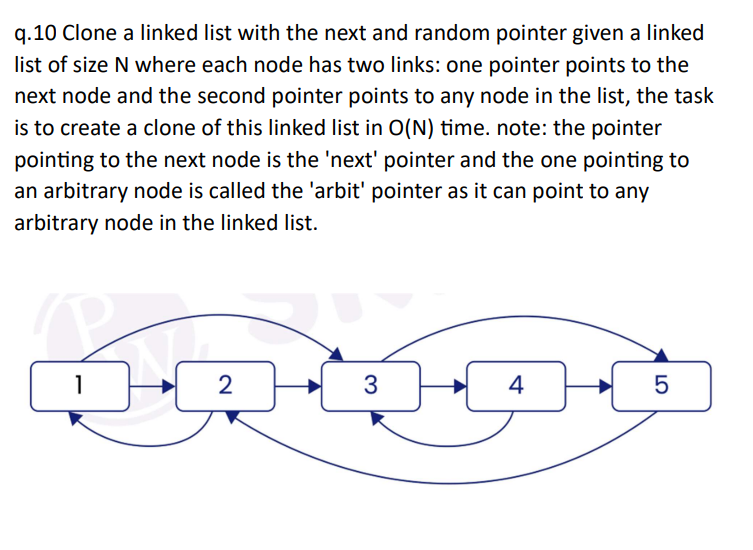

To clone a linked list with next and random pointers in 
𝑂
(
𝑁
)
O(N) time, we can use a three-step process. The idea is to interleave the cloned nodes with the original nodes in the list and then separate them. Here is the step-by-step solution:

Step 1: Create interleaved linked list
For each original node, create a new node and insert it immediately after the original node. The new node will be a clone of the original node.

Step 2: Set the random pointers of the cloned nodes
For each original node, set the random pointer of the cloned node. The random pointer of the cloned node should point to the cloned version of the node that the original node's random pointer points to.

Step 3: Separate the interleaved list into original and cloned lists
Finally, split the interleaved list into two separate lists: the original list and the cloned list.

Here is the implementation of this approach in Python:

In [14]:
class Node:
    def __init__(self, val, next=None, random=None):
        self.val = val
        self.next = next
        self.random = random

def clone_linked_list(head):
    if not head:
        return None

    # Step 1: Create interleaved list
    current = head
    while current:
        new_node = Node(current.val)
        new_node.next = current.next
        current.next = new_node
        current = new_node.next

    # Step 2: Set the random pointers of the cloned nodes
    current = head
    while current:
        if current.random:
            current.next.random = current.random.next
        current = current.next.next

    # Step 3: Separate the interleaved list into original and cloned lists
    current = head
    cloned_head = head.next
    while current:
        cloned_node = current.next
        current.next = cloned_node.next
        if cloned_node.next:
            cloned_node.next = cloned_node.next.next
        current = current.next

    return cloned_head

# Helper function to print the linked list
def print_linked_list(head):
    current = head
    while current:
        random_val = current.random.val if current.random else None
        print(f'Node Value: {current.val}, Random Value: {random_val}')
        current = current.next

# Example usage:
# Creating the linked list shown in the image
node1 = Node(1)
node2 = Node(2)
node3 = Node(3)
node4 = Node(4)
node5 = Node(5)

node1.next = node2
node2.next = node3
node3.next = node4
node4.next = node5

node1.random = node3
node2.random = node1
node3.random = node5
node4.random = node3
node5.random = node2

# Cloning the linked list
cloned_head = clone_linked_list(node1)

# Printing the original and cloned linked lists
print("Original list:")
print_linked_list(node1)
print("\nCloned list:")
print_linked_list(cloned_head)


Original list:
Node Value: 1, Random Value: 3
Node Value: 2, Random Value: 1
Node Value: 3, Random Value: 5
Node Value: 4, Random Value: 3
Node Value: 5, Random Value: 2

Cloned list:
Node Value: 1, Random Value: 3
Node Value: 2, Random Value: 1
Node Value: 3, Random Value: 5
Node Value: 4, Random Value: 3
Node Value: 5, Random Value: 2


Explanation of the Code:
Creating the interleaved list: We iterate through the original list, and for each node, we create a new node with the same value. We then insert this new node immediately after the original node.
Setting the random pointers: We iterate through the interleaved list. For each original node, we set the random pointer of the cloned node to point to the node that the original node's random pointer points to, which can be found by current.random.next.
Separating the lists: We iterate through the interleaved list again and separate the original and cloned nodes by adjusting the next pointers.
This approach ensures that the cloning is done in 
𝑂
(
𝑁
)
O(N) time, where 
𝑁
N is the number of nodes in the original list.